<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving coloradoRiver.txt to coloradoRiver.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))

In [5]:
uploaded = files.upload()

Saving coloradoRiver_ARIMA.txt to coloradoRiver_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving coloradoRiver_r.txt to coloradoRiver_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['coloradoRiver_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,744.000000
mean,-0.118830
std,0.970548
min,-4.314714
25%,-0.568110
50%,-0.350432
75%,0.093252
max,5.365810


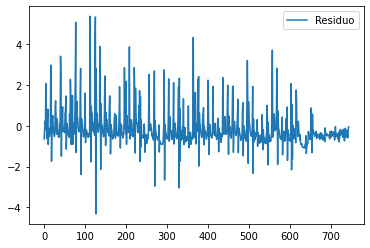

In [10]:
data_r.plot()

In [11]:
len(data)

744

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [13]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.378795       NaN       NaN  ...       NaN       NaN       NaN
1    0.419852  0.378795       NaN  ...       NaN       NaN       NaN
2    0.468420  0.419852  0.378795  ...       NaN       NaN       NaN
3    0.430527  0.468420  0.419852  ...       NaN       NaN       NaN
4    0.659699  0.430527  0.468420  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  0.423610  0.422480  0.388125  ...  0.388466  0.405550  0.406346
740  0.409889  0.423610  0.422480  ...  0.428060  0.388466  0.405550
741  0.384481  0.409889  0.423610  ...  0.421167  0.428060  0.388466
742  0.418838  0.384481  0.409889  ...  0.394989  0.421167  0.428060
743  0.441343  0.418838  0.384481  ...  0.369361  0.394989  0.421167

[744 rows x 13 columns]


In [14]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3128, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.4366, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


129
100
503


In [15]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

        ARIMA     ARIMA     ARIMA  ...     ARIMA     ARIMA     ARIMA
0    1.107782       NaN       NaN  ...       NaN       NaN       NaN
1    0.780329  1.107782       NaN  ...       NaN       NaN       NaN
2    1.020163  0.780329  1.107782  ...       NaN       NaN       NaN
3    1.626990  1.020163  0.780329  ...       NaN       NaN       NaN
4    1.618485  1.626990  1.020163  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
739  1.443947  1.334886  1.607458  ...  1.264157  1.338776  1.451075
740  1.486771  1.443947  1.334886  ...  1.100866  1.264157  1.338776
741  1.362737  1.486771  1.443947  ...  1.377601  1.100866  1.264157
742  1.080139  1.362737  1.486771  ...  1.471009  1.377601  1.100866
743  1.252280  1.080139  1.362737  ...  1.279104  1.471009  1.377601

[744 rows x 13 columns]


In [16]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3128, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.4366, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

129
100
503


In [17]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

        X     X     X     X     X     X  ...     X     X     X     X     X     X
0    0.46   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1    0.53  0.46   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
2    1.24  0.53  0.46   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3    1.48  1.24  0.53  0.46   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4    3.69  1.48  1.24  0.53  0.46   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
739  1.23  1.11  1.05  1.26  0.95  0.46  ...  0.98  1.14  0.93  0.71  0.95  1.07
740  1.14  1.23  1.11  1.05  1.26  0.95  ...  0.54  0.98  1.14  0.93  0.71  0.95
741  0.77  1.14  1.23  1.11  1.05  1.26  ...  0.46  0.54  0.98  1.14  0.93  0.71
742  0.82  0.77  1.14  1.23  1.11  1.05  ...  0.95  0.46  0.54  0.98  1.14  0.93
743  1.21  0.82  0.77  1.14  1.23  1.11  ...  1.26  0.95  0.46  0.54  0.98  1.14

[744 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3128, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.4366, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

129
100
503


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []

    average_k_best_predictions = []
    mse_averages_k_best = []
    final_experiment_k_averages = []

    median_k_best_predictions = []
    mse_medians_k_best = []
    final_experiment_k_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_val)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_val, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k)

        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_val_ARIMA, y_val_raw)

        # Storing the Ensemble's (final system) mse
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        # Storing the mse of the average predictions
        mse_A, mse_AR = residual_performance(average_p, y_val_ARIMA, y_val_raw)
        mse_averages.append(mse_A)

        # Storing the mse of the average k best predictions
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_val_ARIMA, y_val_raw)
        mse_averages_k_best.append(mse_A_k_best)

        # Storing the mse of the median predictions
        mse_M, mse_AR = residual_performance(median_p, y_val_ARIMA, y_val_raw)
        mse_medians.append(mse_M)

        # Storing the mse of the median k best predictions
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_val_ARIMA, y_val_raw)
        mse_medians_k_best.append(mse_M_k_best)

        # Getting the final results of the current experiment
        # and storing them
        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)

        print('\nExperiment # %d: done. MSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(e+1, mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average = final_experiment_averages[aux_result_2]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average = final_experiment_k_averages[aux_result_2]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, 
                    corresponding_average, corresponding_median,
                    corresponding_k_average, corresponding_k_median,c)

    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    
    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Val_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Val_MSE_ColoradoRiver_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def display_results(configuration, final_predictions, 
                    final_predictions_average, final_predictions_median, 
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_val_raw
    ARIMA = y_val_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median)

    print('\n')
    print('\n')

In [0]:
def results(regression, average, median, k_average, k_median):
    
    import numpy as np

    data = y_val_raw
    ARIMA = y_val_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_val

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_val) 

        mse.append(mean_squared_error(y_predict, y_val))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_val_raw)), y_val_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

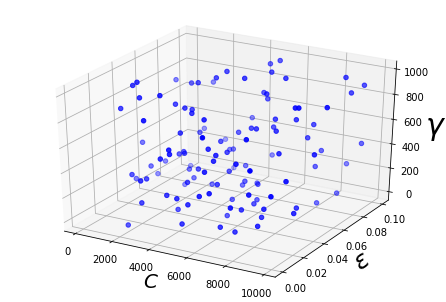






Experiment # 1: done. MSE_g_Best: 0.547941; MSE_AV: 0.553179; MSE_MD: 0.547171; MSE_k_AV: 0.548470; MSE_k_MD: 0.548396


Experiment # 2: done. MSE_g_Best: 0.554972; MSE_AV: 0.558792; MSE_MD: 0.559112; MSE_k_AV: 0.555642; MSE_k_MD: 0.555645


Experiment # 3: done. MSE_g_Best: 0.554835; MSE_AV: 0.558489; MSE_MD: 0.558471; MSE_k_AV: 0.555955; MSE_k_MD: 0.555974


Experiment # 4: done. MSE_g_Best: 0.547887; MSE_AV: 0.567403; MSE_MD: 0.549145; MSE_k_AV: 0.548463; MSE_k_MD: 0.548447


Experiment # 5: done. MSE_g_Best: 0.547790; MSE_AV: 0.562600; MSE_MD: 0.550584; MSE_k_AV: 0.548463; MSE_k_MD: 0.548310



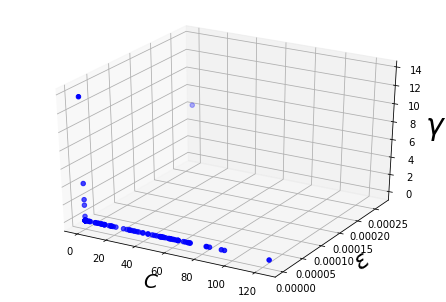






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547790

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.562600

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548463

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.550584

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548310

Best Configuration Found:

SVR(C=30.24892144596913, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



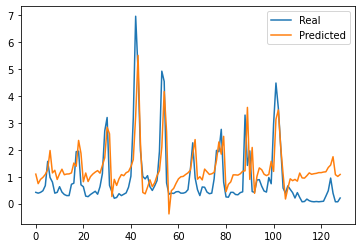


Ensemble Model series` predicitions:



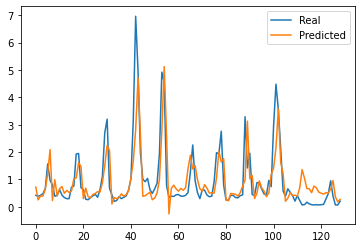


Ensemble Model best Average series` predicitions:



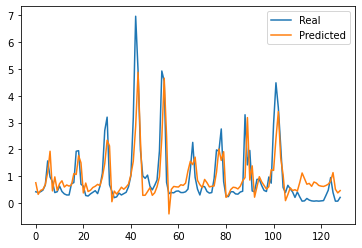


Ensemble Model K best Average series` predicitions:



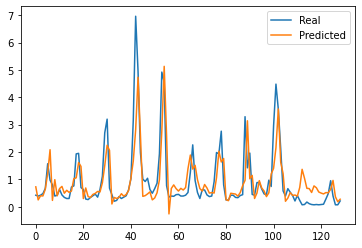


Ensemble Model best Median series` predicitions:



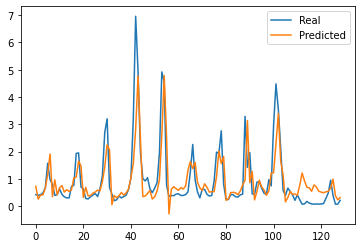


Ensemble Model K best Median series` predicitions:



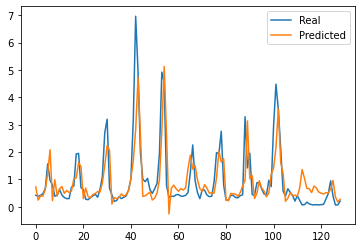






Best Result: Experiment # 5 . Mean Squared Error = 0.547790



In [84]:
pso(120, 100, 3, 1, 5, 5)

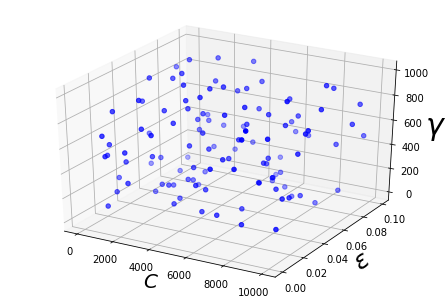






Experiment # 1: done. MSE_g_Best: 0.547887; MSE_AV: 0.573234; MSE_MD: 0.566780; MSE_k_AV: 0.548822; MSE_k_MD: 0.548760


Experiment # 2: done. MSE_g_Best: 0.547172; MSE_AV: 0.566939; MSE_MD: 0.551447; MSE_k_AV: 0.548251; MSE_k_MD: 0.548722


Experiment # 3: done. MSE_g_Best: 0.554624; MSE_AV: 0.558388; MSE_MD: 0.558151; MSE_k_AV: 0.556160; MSE_k_MD: 0.555940


Experiment # 4: done. MSE_g_Best: 0.547835; MSE_AV: 0.605169; MSE_MD: 0.666114; MSE_k_AV: 0.549032; MSE_k_MD: 0.549041


Experiment # 5: done. MSE_g_Best: 0.554669; MSE_AV: 0.559098; MSE_MD: 0.559249; MSE_k_AV: 0.556363; MSE_k_MD: 0.556259



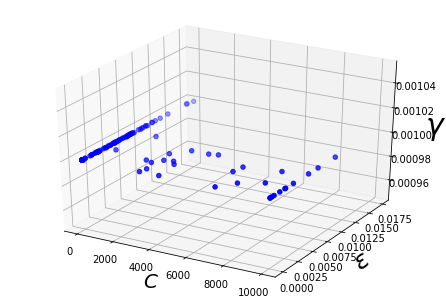






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547172

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.566939

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548251

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.551447

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548722

Best Configuration Found:

SVR(C=32.73735883379926, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.004656398545927875, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



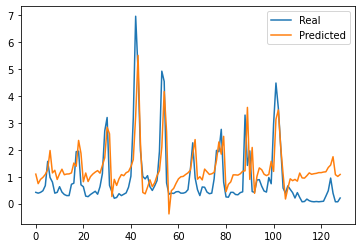


Ensemble Model series` predicitions:



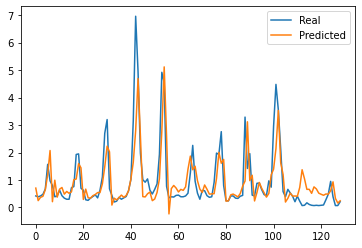


Ensemble Model best Average series` predicitions:



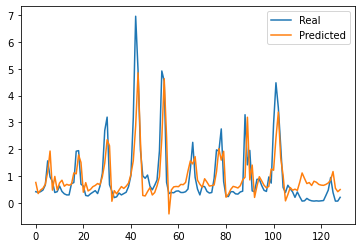


Ensemble Model K best Average series` predicitions:



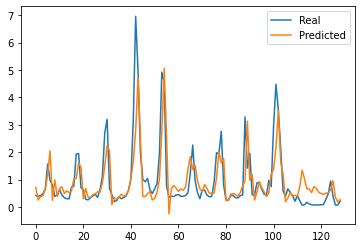


Ensemble Model best Median series` predicitions:



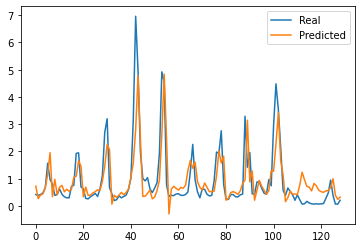


Ensemble Model K best Median series` predicitions:



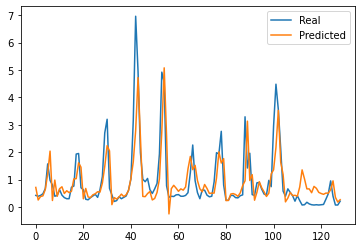






Best Result: Experiment # 2 . Mean Squared Error = 0.547172



In [85]:
pso(120, 100, 3, 1, 10, 5)

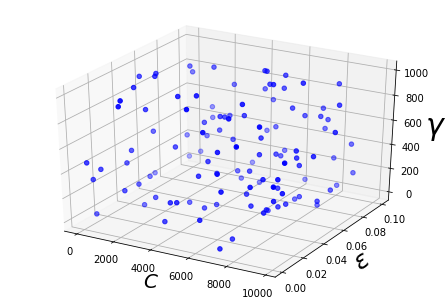






Experiment # 1: done. MSE_g_Best: 0.554664; MSE_AV: 0.558543; MSE_MD: 0.558574; MSE_k_AV: 0.556734; MSE_k_MD: 0.556722


Experiment # 2: done. MSE_g_Best: 0.547900; MSE_AV: 0.593484; MSE_MD: 0.666114; MSE_k_AV: 0.548895; MSE_k_MD: 0.549076


Experiment # 3: done. MSE_g_Best: 0.547887; MSE_AV: 0.606957; MSE_MD: 0.666114; MSE_k_AV: 0.549332; MSE_k_MD: 0.548517


Experiment # 4: done. MSE_g_Best: 0.547835; MSE_AV: 0.553418; MSE_MD: 0.548647; MSE_k_AV: 0.548795; MSE_k_MD: 0.548924


Experiment # 5: done. MSE_g_Best: 0.547028; MSE_AV: 0.601976; MSE_MD: 0.663243; MSE_k_AV: 0.549182; MSE_k_MD: 0.549119



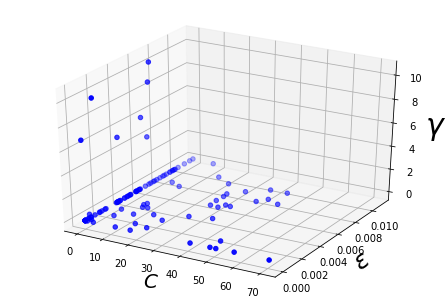






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547028

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.601976

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549182

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.663243

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549119

Best Configuration Found:

SVR(C=19.584260682464155, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0043319677506825655, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



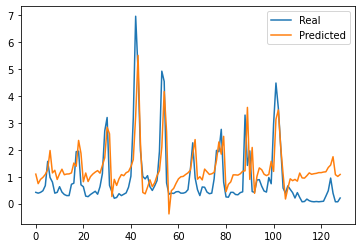


Ensemble Model series` predicitions:



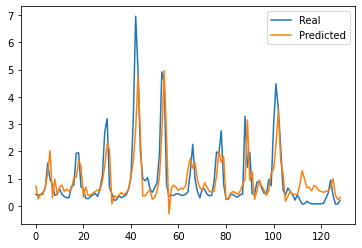


Ensemble Model best Average series` predicitions:



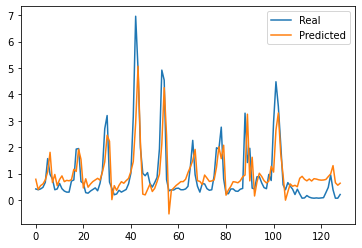


Ensemble Model K best Average series` predicitions:



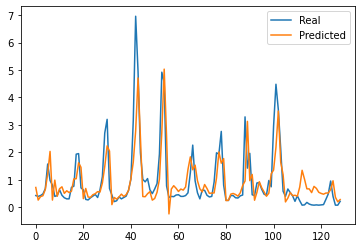


Ensemble Model best Median series` predicitions:



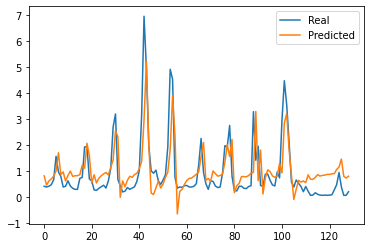


Ensemble Model K best Median series` predicitions:



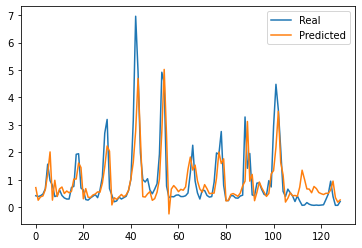






Best Result: Experiment # 5 . Mean Squared Error = 0.547028



In [86]:
pso(120, 100, 3, 1, 20, 5)

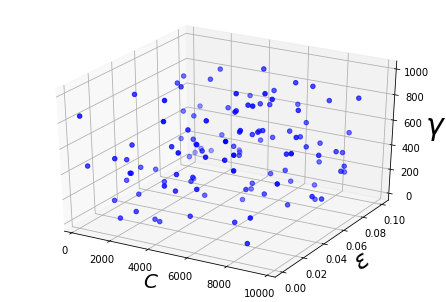






Experiment # 1: done. MSE_g_Best: 0.548001; MSE_AV: 0.604149; MSE_MD: 0.666114; MSE_k_AV: 0.550955; MSE_k_MD: 0.551419


Experiment # 2: done. MSE_g_Best: 0.547897; MSE_AV: 0.556237; MSE_MD: 0.548218; MSE_k_AV: 0.548918; MSE_k_MD: 0.548958


Experiment # 3: done. MSE_g_Best: 0.554766; MSE_AV: 0.558801; MSE_MD: 0.558765; MSE_k_AV: 0.557044; MSE_k_MD: 0.556348


Experiment # 4: done. MSE_g_Best: 0.547938; MSE_AV: 0.593487; MSE_MD: 0.666114; MSE_k_AV: 0.549452; MSE_k_MD: 0.548773


Experiment # 5: done. MSE_g_Best: 0.547887; MSE_AV: 0.557009; MSE_MD: 0.547518; MSE_k_AV: 0.548789; MSE_k_MD: 0.548758



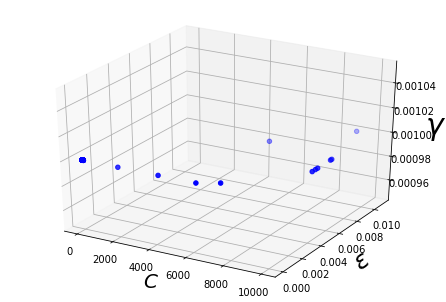






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547887

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.557009

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548789

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547518

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548758

Best Configuration Found:

SVR(C=30.43362915720987, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



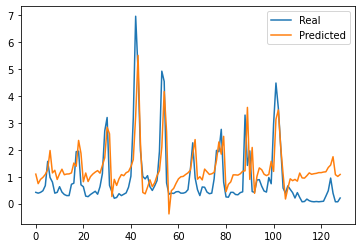


Ensemble Model series` predicitions:



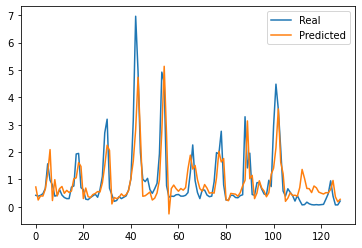


Ensemble Model best Average series` predicitions:



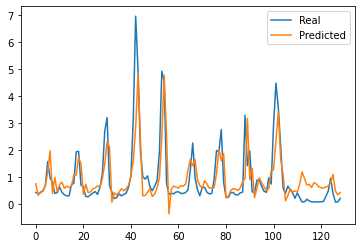


Ensemble Model K best Average series` predicitions:



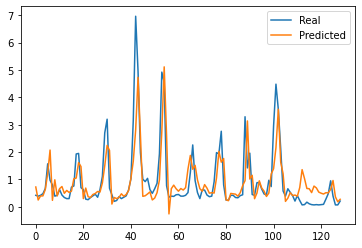


Ensemble Model best Median series` predicitions:



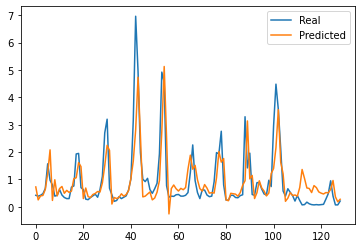


Ensemble Model K best Median series` predicitions:



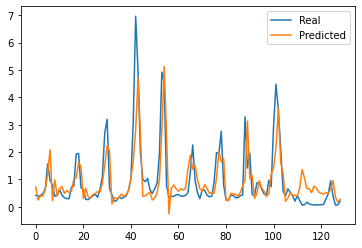






Best Result: Experiment # 5 . Mean Squared Error = 0.547887



In [27]:
pso(120, 100, 3, 1, 30, 5)

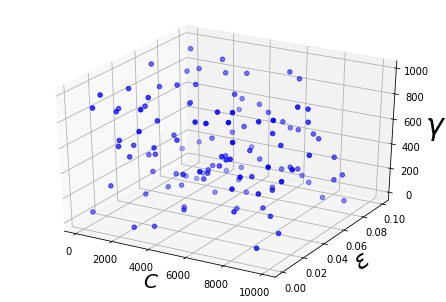






Experiment # 1: done. MSE_g_Best: 0.547902; MSE_AV: 0.571092; MSE_MD: 0.551643; MSE_k_AV: 0.548934; MSE_k_MD: 0.549083


Experiment # 2: done. MSE_g_Best: 0.554996; MSE_AV: 0.558655; MSE_MD: 0.558765; MSE_k_AV: 0.557185; MSE_k_MD: 0.556562


Experiment # 3: done. MSE_g_Best: 0.554688; MSE_AV: 0.558569; MSE_MD: 0.558415; MSE_k_AV: 0.557093; MSE_k_MD: 0.556432


Experiment # 4: done. MSE_g_Best: 0.547887; MSE_AV: 0.555723; MSE_MD: 0.547731; MSE_k_AV: 0.550007; MSE_k_MD: 0.549605


Experiment # 5: done. MSE_g_Best: 0.483883; MSE_AV: 0.621506; MSE_MD: 0.666114; MSE_k_AV: 0.576111; MSE_k_MD: 0.599380



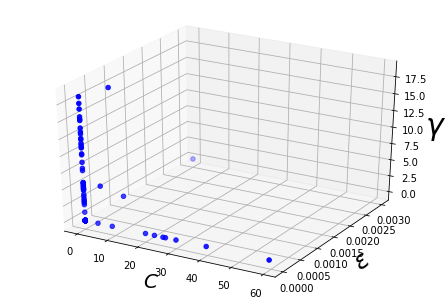






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.483883

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.621506

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.576111

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.666114

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.599380

Best Configuration Found:

SVR(C=0.0227035042368526, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=7.192823793024978, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)





ARIMA Model series` predicitions:



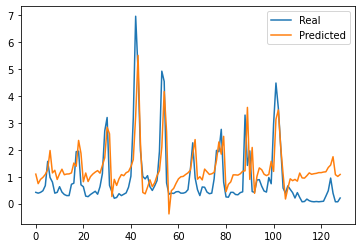


Ensemble Model series` predicitions:



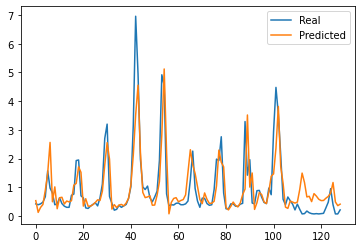


Ensemble Model best Average series` predicitions:



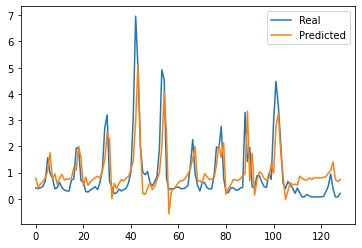


Ensemble Model K best Average series` predicitions:



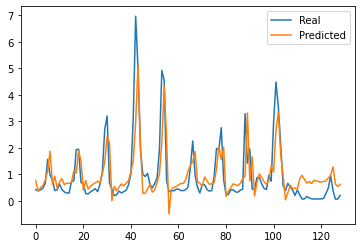


Ensemble Model best Median series` predicitions:



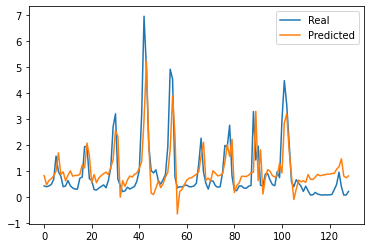


Ensemble Model K best Median series` predicitions:



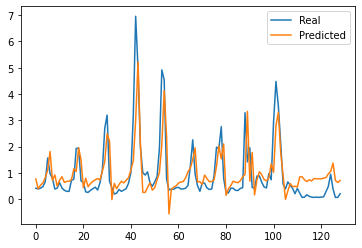






Best Result: Experiment # 5 . Mean Squared Error = 0.483883



In [28]:
pso(120, 100, 3, 1, 40, 5)

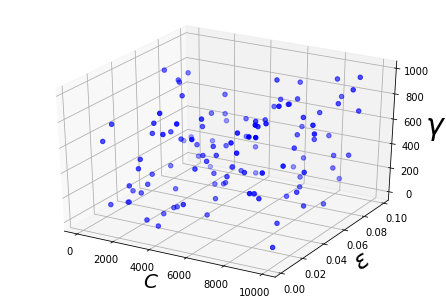






Experiment # 1: done. MSE_g_Best: 0.547024; MSE_AV: 0.619912; MSE_MD: 0.664406; MSE_k_AV: 0.573250; MSE_k_MD: 0.568272


Experiment # 2: done. MSE_g_Best: 0.554722; MSE_AV: 0.558793; MSE_MD: 0.558745; MSE_k_AV: 0.557540; MSE_k_MD: 0.557125


Experiment # 3: done. MSE_g_Best: 0.547898; MSE_AV: 0.575870; MSE_MD: 0.584764; MSE_k_AV: 0.549862; MSE_k_MD: 0.548502


Experiment # 4: done. MSE_g_Best: 0.546936; MSE_AV: 0.556848; MSE_MD: 0.551201; MSE_k_AV: 0.551951; MSE_k_MD: 0.557690


Experiment # 5: done. MSE_g_Best: 0.547926; MSE_AV: 0.583559; MSE_MD: 0.660637; MSE_k_AV: 0.549601; MSE_k_MD: 0.548508



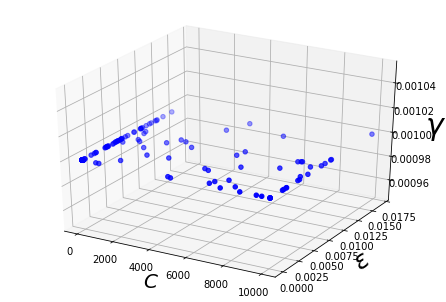






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.546936

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.556848

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.551951

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.551201

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.557690

Best Configuration Found:

SVR(C=19.815920502012688, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0048529308383046706, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



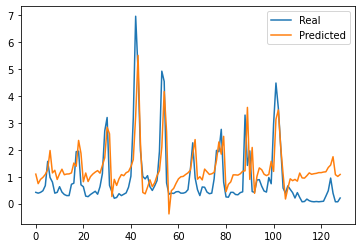


Ensemble Model series` predicitions:



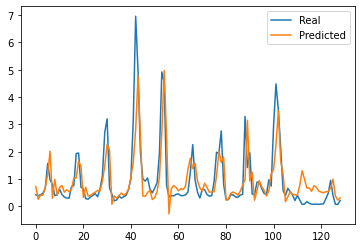


Ensemble Model best Average series` predicitions:



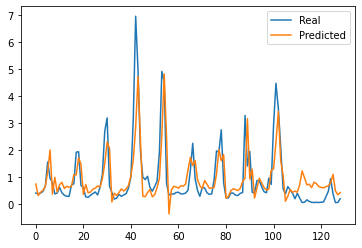


Ensemble Model K best Average series` predicitions:



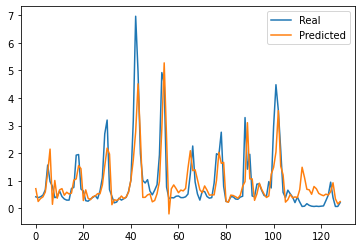


Ensemble Model best Median series` predicitions:



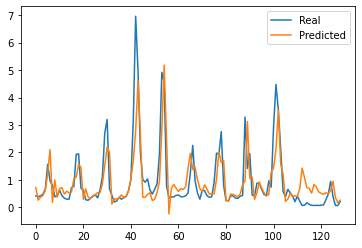


Ensemble Model K best Median series` predicitions:



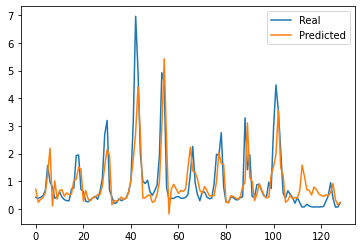






Best Result: Experiment # 4 . Mean Squared Error = 0.546936



In [29]:
pso(120, 100, 3, 1, 50, 5)

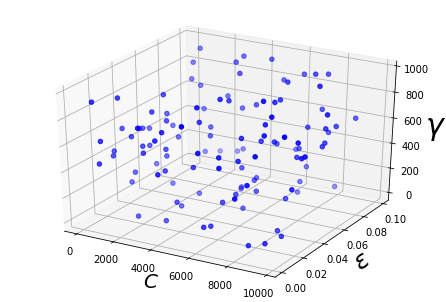






Experiment # 1: done. MSE_g_Best: 0.554577; MSE_AV: 0.558664; MSE_MD: 0.558646; MSE_k_AV: 0.557636; MSE_k_MD: 0.557325


Experiment # 2: done. MSE_g_Best: 0.554589; MSE_AV: 0.558681; MSE_MD: 0.558747; MSE_k_AV: 0.557578; MSE_k_MD: 0.557379


Experiment # 3: done. MSE_g_Best: 0.554900; MSE_AV: 0.558878; MSE_MD: 0.558937; MSE_k_AV: 0.557618; MSE_k_MD: 0.558340


Experiment # 4: done. MSE_g_Best: 0.547986; MSE_AV: 0.563121; MSE_MD: 0.549360; MSE_k_AV: 0.549682; MSE_k_MD: 0.548790


Experiment # 5: done. MSE_g_Best: 0.555059; MSE_AV: 0.558881; MSE_MD: 0.559089; MSE_k_AV: 0.557724; MSE_k_MD: 0.557237



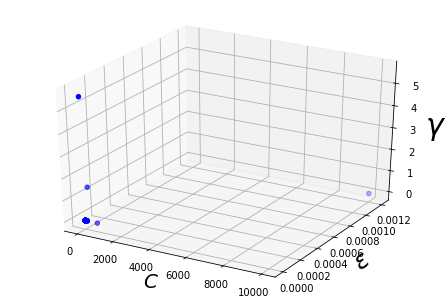






Mean Squared Error for the ARIMA Model:	 0.795558

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 0.547986

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.563121

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549682

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.549360

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 0.548790

Best Configuration Found:

SVR(C=29.942867351814083, cache_size=200, coef0=0.0, degree=3, epsilon=1e-08,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



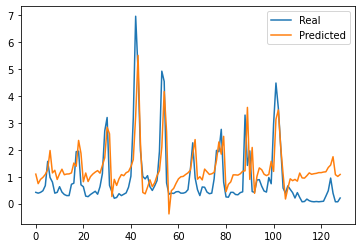


Ensemble Model series` predicitions:



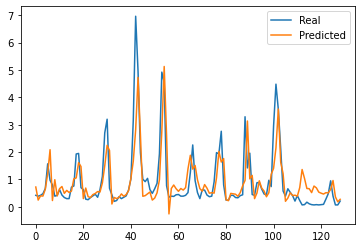


Ensemble Model best Average series` predicitions:



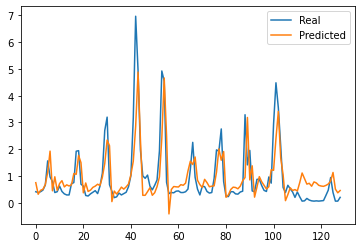


Ensemble Model K best Average series` predicitions:



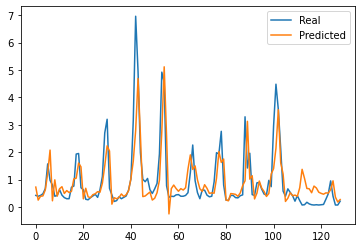


Ensemble Model best Median series` predicitions:



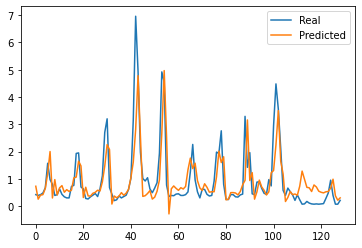


Ensemble Model K best Median series` predicitions:



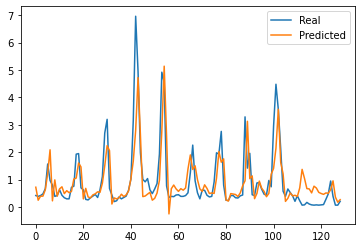






Best Result: Experiment # 4 . Mean Squared Error = 0.547986



In [30]:
pso(120, 100, 3, 1, 60, 5)